In [2]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import datetime
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')


In [3]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col='공고게시일자')

In [4]:
df.index = df.index.astype(str)

df.index = pd.to_datetime(df.index)

In [5]:
water_df = df[df.수요기관명 == "한국수자원공사"] # 용역
water_df_service = water_df[water_df.대상 == "용역"]

In [6]:
col_name = ["추정가격"]
water_service = pd.DataFrame(data = water_df_service,columns = col_name)

In [7]:
water_service['date'] = water_service.index
water_service.dtypes

water_service['date'] = water_service['date'].astype(str)

water_service['date'] = pd.to_datetime(water_service['date'])

water_groups = water_service.groupby(["date"]).추정가격.sum()
water_group_df = pd.DataFrame(data=water_groups, index = water_groups.index)

water_group_df.tail()

,추정가격
date,
2021-12-27,162250600.00
2021-12-28,306701000.00
2021-12-29,361531000.00
2021-12-30,689758200.00
2021-12-31,3045898000.00


In [8]:
water_group_df

,추정가격
date,
2018-01-02,0.00
2018-01-04,0.00
2018-01-05,0.00
2018-01-08,0.00
2018-01-09,0.00
...,...
2021-12-27,162250600.00
2021-12-28,306701000.00
2021-12-29,361531000.00


In [9]:
water_sample = water_group_df[water_group_df.추정가격!=0]

<AxesSubplot:xlabel='date'>

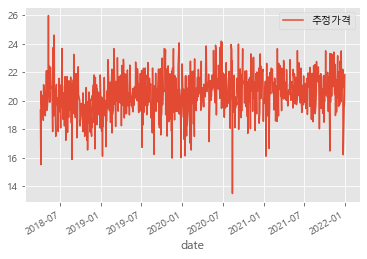

In [62]:
water_sample_log = np.log(water_sample)
water_sample_log.plot()

Text(0.5, 1.0, '한국수자원공사 용역 추정가격_week')

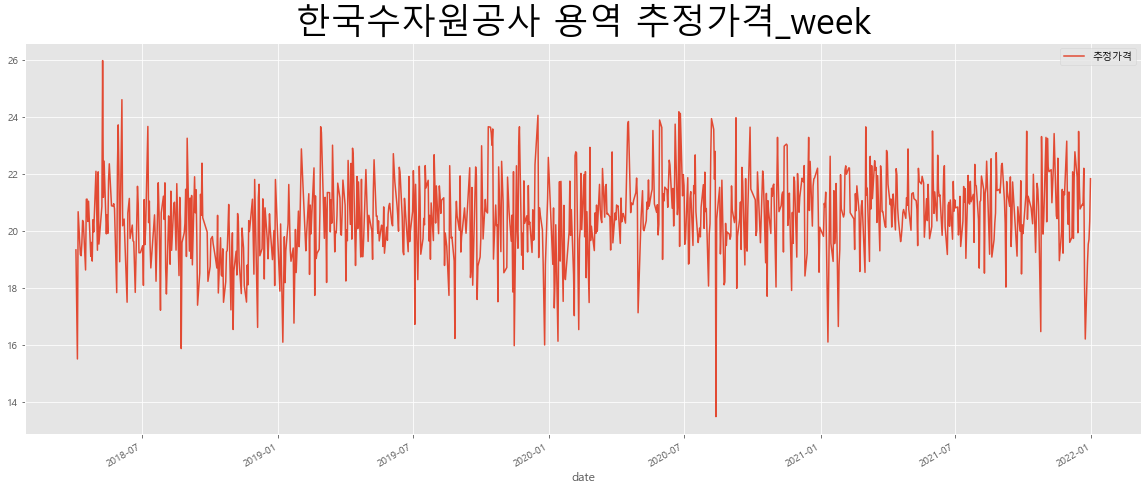

In [63]:
water_sample_log.plot(figsize=(20,8))
plt.title("한국수자원공사 용역 추정가격_week",fontsize=35)

In [64]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(water_sample_log[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -6.959106
p-value : 0.000000
Critical values:
	1%:-3.438
	5%:-2.865
	10%:-2.568


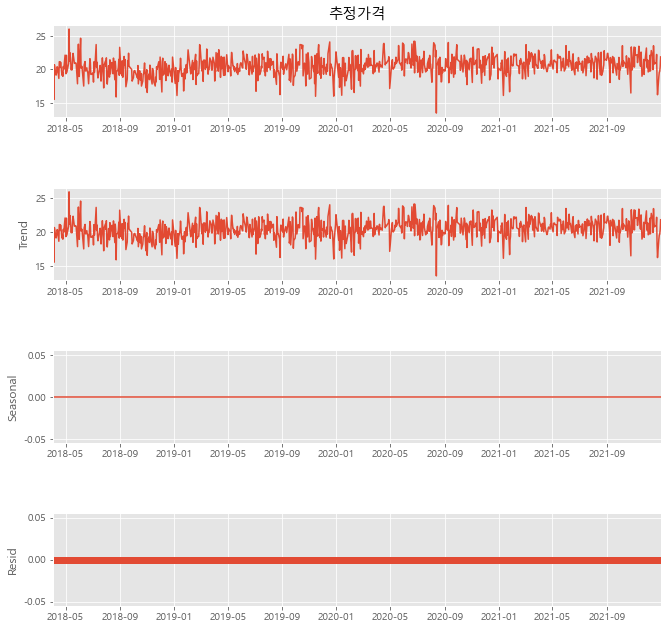

In [65]:
decomposition = sm.tsa.seasonal_decompose(water_sample_log['추정가격'],model='additive',period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()


# observed: 실제관측치에 대한 row data
# Trend
# Seasonal
# resi

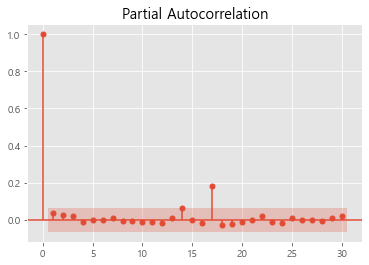

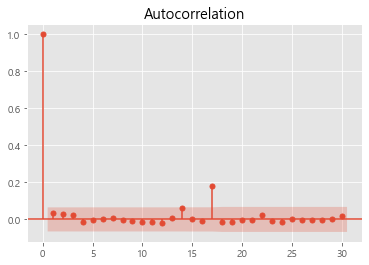

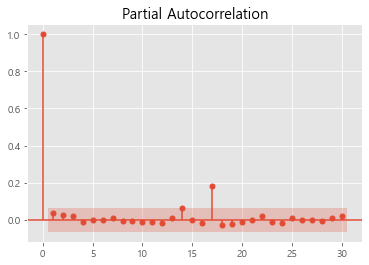

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(water_sample.추정가격)
plot_pacf(water_sample.추정가격)

<AxesSubplot:xlabel='date'>

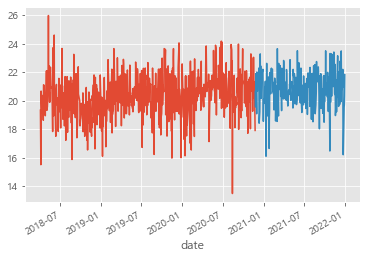

In [66]:
y_train = water_sample_log['추정가격'][:int(0.7*len(water_sample))]
y_test = water_sample_log['추정가격'][int(0.7*len(water_sample)):]
y_train.plot()
y_test.plot()

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [141]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , D = 1
                      , start_p = 10 
                      , max_p = 30   
                      , start_q = 7 
                      , max_q = 30   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      #, trend = True
                      )
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(10,1,7)(0,0,0)[0] intercept   : AIC=2341.430, Time=6.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2744.799, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2544.995, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2334.531, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2742.800, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2336.431, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2336.437, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2337.607, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2332.721, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2334.621, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2334.627, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2542.996, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2335.797, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.941 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [142]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  637
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1164.361
Date:                Wed, 23 Feb 2022   AIC                           2332.721
Time:                        13:07:59   BIC                           2341.632
Sample:                             0   HQIC                          2336.181
                                - 637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9488      0.014    -69.659      0.000      -0.976      -0.922
sigma2         2.2705      0.099     22.855      0.000       2.076       2.465
Ljung-Box (L1) (Q):                   0.10   Jarque-

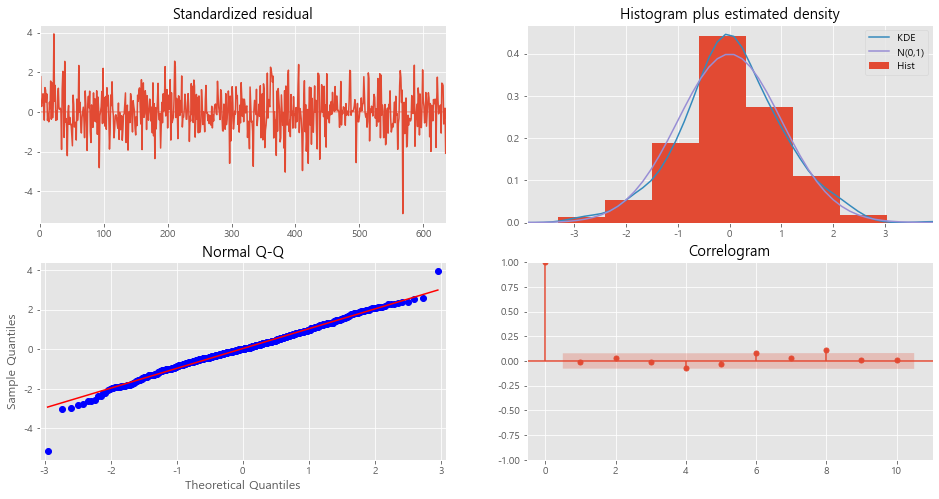

In [143]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

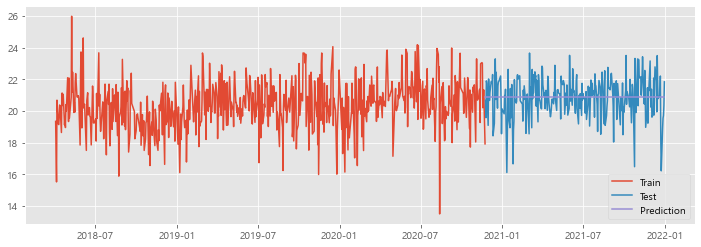

In [144]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

-0.009281173808123766


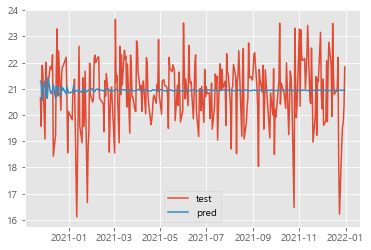

In [128]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test
y_pred_temp_val = y_predict

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

plt.plot(y_test_temp_val,label = "test")
plt.plot(y_pred_temp_val, label = "pred")
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test[:14]
y_pred_temp_val = y_predict[:14]
#R2 = r2_score(y_test_temp_val,y_pred_temp_val)
#print(R2)

In [100]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [129]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

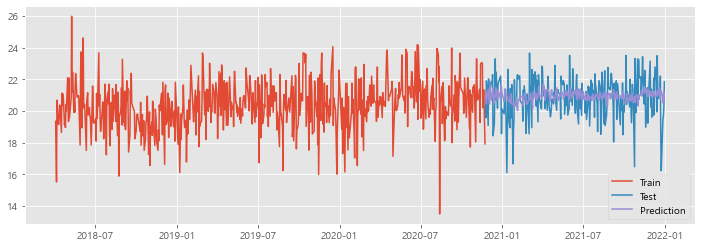

In [130]:
# 테스트 데이터 개수만큼 예측
#y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_pred,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

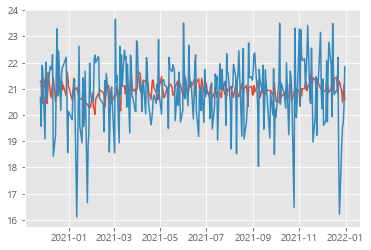

In [136]:
plt.plot(y_test.index,y_pred)
plt.plot(y_test)

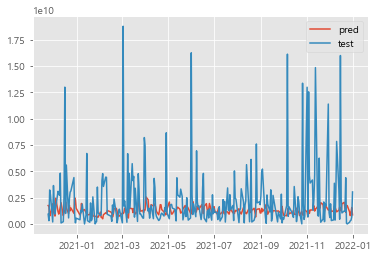

In [132]:
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

plt.plot(y_test.index,y_pred_exp,label="pred")
plt.plot(y_test_exp,label="test")
plt.legend()
plt.show()

In [123]:
y_test_exp[:50]

date
2020-11-24     933574000.00
2020-11-25     315570000.00
2020-11-26    3234447000.00
2020-11-27    2782864000.00
2020-11-30     194659433.00
2020-12-01    3651648150.00
2020-12-02    1970080200.00
2020-12-03     939373273.00
2020-12-04    1579505000.00
2020-12-07    3099192000.00
2020-12-08    2940948620.00
2020-12-09    2730237150.00
2020-12-10    4829830000.00
2020-12-11     100452000.00
2020-12-14     223703000.00
2020-12-15    2756280000.00
2020-12-16   12990697180.00
2020-12-17     999064000.00
2020-12-18    5598227909.00
2020-12-21     578246400.00
2020-12-22    2354201000.00
2020-12-23    3024456872.00
2020-12-24    3139280000.00
2020-12-28    4408689000.00
2020-12-29     915833000.00
2020-12-30     114627700.00
2020-12-31     555808000.00
2021-01-05     403746000.00
2021-01-06    1279791439.00
2021-01-07    1145019000.00
2021-01-08    1902087000.00
2021-01-11       9900000.00
2021-01-13     850279000.00
2021-01-14    6697524000.00
2021-01-15     315827000.00
2021-01-18     